In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("Loss_Data.csv")
df = pd.read_csv("Loss_Data.csv").drop(df.columns[0], axis=1)

In [46]:
print(df)

      Epoch  D_Adv_Real  D_Aux_Real  D_Adv_Fake  D_Aux_Fake    acc     G_Adv  \
0       0.0    0.719657    2.197769    0.667333    2.196635  13.28  0.719658   
1       0.0    0.719038    2.198687    0.667922    2.197310   9.38  0.719041   
2       0.0    0.718496    2.196925    0.668441    2.197709  16.41  0.718497   
3       0.0    0.717943    2.196303    0.668965    2.197326  13.28  0.717941   
4       0.0    0.717392    2.198068    0.669490    2.196409   9.38  0.717393   
...     ...         ...         ...         ...         ...    ...       ...   
6795  199.0    0.693146    2.120997    0.693148    1.388008  63.28  0.693146   
6796  199.0    0.693148    2.090557    0.693147    1.383895  64.06  0.693148   
6797  199.0    0.693147    2.137510    0.693148    1.375744  60.16  0.693147   
6798  199.0    0.693147    2.115573    0.693148    1.379664  60.94  0.693147   
6799  199.0    0.693148    2.126152    0.693147    1.377121  59.38  0.693148   

         G_Aux  
0     2.197007  
1    

In [90]:
new_df = pd.DataFrame(df.loc[df['Epoch'] == 0].mean()).transpose()
for i in range(1,200):
    temp = df.loc[df['Epoch'] == i].mean()
    new_df.loc[len(new_df)] = temp
    
col = new_df.loc[:, ['D_Adv_Real', 'D_Adv_Fake']]
print(col)
new_df['D_Adv'] = col.mean(1)

col = new_df.loc[:, ['D_Aux_Real', 'D_Aux_Fake']]
print(col)
new_df['D_Aux'] = col.mean(1)

     D_Adv_Real  D_Adv_Fake
0      0.711115    0.675535
1      0.698288    0.688057
2      0.693666    0.692648
3      0.692880    0.693461
4      0.693485    0.693552
..          ...         ...
195    0.693147    0.693147
196    0.693123    0.693180
197    0.693175    0.693120
198    0.693148    0.693146
199    0.693147    0.693147

[200 rows x 2 columns]
     D_Aux_Real  D_Aux_Fake
0      2.197622    2.197225
1      2.197382    2.197346
2      2.197076    2.197289
3      2.196135    2.196661
4      2.192979    2.176448
..          ...         ...
195    2.119372    1.378269
196    2.120815    1.377057
197    2.118426    1.376883
198    2.120267    1.379621
199    2.119006    1.378184

[200 rows x 2 columns]


In [49]:
import matplotlib.pyplot as plt

In [92]:
plt.plot('Epoch','D_Adv', data = new_df.head(60), color="red")
plt.plot('Epoch','G_Adv', data = new_df.head(60), color="blue")
plt.xlabel("Epoch")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


ValueError: could not convert string to float: 'Epoch'

In [97]:
plt.plot('Epoch', 'G_Aux', data = new_df, color="red")
plt.plot('Epoch', 'D_Aux', data = new_df, color="blue")
plt.xlabel("Epoch")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


ValueError: could not convert string to float: 'Epoch'

In [98]:
plt.plot('Epoch', 'acc', data = new_df, color="red")
plt.xlabel("Epoch")
plt.legend()

ValueError: could not convert string to float: 'Epoch'

In [99]:
new_df['acc'].max()

61.926470588235304

In [100]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def flatten(t):
    return [item for sublist in t for item in sublist]
%matplotlib notebook
import random

In [113]:
fs = np.load('skels/400_data.npy')

i = random.randint(0, len(fs)-1)
x_cords = fs[i][0]
y_cords = fs[i][1]
z_cords = fs[i][2]


x = flatten(x_cords[0].tolist())
y = flatten(y_cords[0].tolist())
z = flatten(z_cords[0].tolist())

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim3d(-5,5)
ax1.set_ylim3d(-5,5)
ax1.set_zlim3d(-5,5)
ax1.set_xlabel('lateral distance from lidar')
ax1.set_ylabel('depth distance from lidar')
ax1.set_zlabel('height from ground')
ax1.scatter(x, z, y)
plt.show()

[[[[[-0.5782398 ]
    [-0.20068818]
    [-0.59890336]
    ...
    [-0.999676  ]
    [-0.85335416]
    [-0.873844  ]]

   [[-0.72434473]
    [-0.9725023 ]
    [-0.9217369 ]
    ...
    [-0.99078417]
    [-0.9824622 ]
    [-0.9887618 ]]

   [[-0.61624306]
    [-0.31012326]
    [-0.97931325]
    ...
    [ 0.7108911 ]
    [-0.56865394]
    [-0.9712172 ]]]


  [[[-0.3550677 ]
    [ 0.05785841]
    [-0.49947324]
    ...
    [-0.9979464 ]
    [-0.752021  ]
    [-0.85877895]]

   [[-0.7074689 ]
    [-0.95328355]
    [-0.831685  ]
    ...
    [-0.99003875]
    [-0.9873558 ]
    [-0.98445225]]

   [[-0.40164924]
    [-0.12960462]
    [-0.98704654]
    ...
    [ 0.69588155]
    [-0.24808927]
    [-0.9579329 ]]]


  [[[-0.10630245]
    [ 0.3884822 ]
    [ 0.17877679]
    ...
    [-0.9988737 ]
    [-0.8667713 ]
    [-0.7714697 ]]

   [[-0.7677516 ]
    [-0.9029961 ]
    [-0.59707904]
    ...
    [-0.97084606]
    [-0.97367156]
    [-0.9815067 ]]

   [[-0.51999485]
    [-0.24366778]
    [-0.9373518 

"\nfig1 = plt.figure()\nax1 = fig1.add_subplot(projection='3d')\nax1.set_xlim3d(-5,5)\nax1.set_ylim3d(-5,5)\nax1.set_zlim3d(-5,5)\nax1.set_xlabel('lateral distance from lidar')\nax1.set_ylabel('depth distance from lidar')\nax1.set_zlabel('height from ground')\nax1.scatter(x, z, y)\nplt.show()\n"

[2.6350839138031006, 2.7033021450042725, 1.3911347389221191, 1.42481529712677, 0.09071435034275055, 0.08996599167585373, 0.21227003633975983, 0.20934918522834778, -1.0588103532791138, -1.0476983785629272, -1.9469047784805298, -1.9309852123260498, -2.612959623336792]
[1.3915611505508423, 0.8201029300689697, 1.331937551498413, 0.5759891867637634, 1.7840489149093628, 0.08996599167585373, 1.7891331911087036, -0.029907025396823883, 1.7243481874465942, -0.08980271965265274, 1.2879524230957031, 0.44561195373535156, 0.9310545921325684]
[50.03205871582031, 51.32731246948242, 50.01673126220703, 51.22767639160156, 51.09738540649414, 50.67585372924805, 51.24300765991211, 50.537899017333984, 51.12038040161133, 50.58388137817383, 50.614540100097656, 50.2006721496582, 50.75249481201172]


<IPython.core.display.Javascript object>


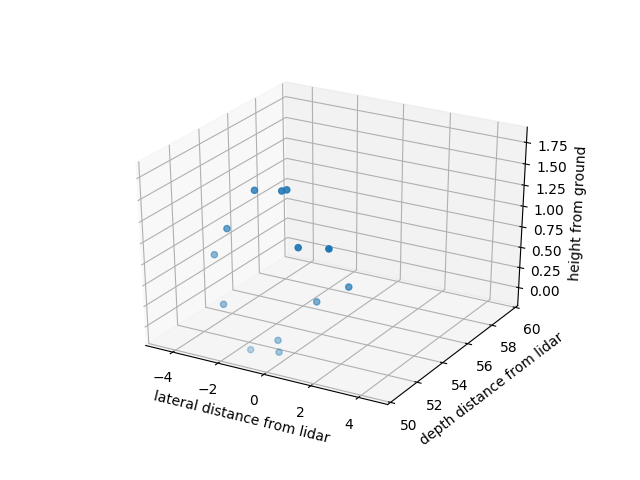

In [122]:
fs = np.load('lidar_mocap/train_data.npy')

i = random.randint(0, len(fs))
x_cords = fs[i][0]
y_cords = fs[i][1]
z_cords = fs[i][2]

x = flatten(x_cords[0].tolist())
y = flatten(y_cords[0].tolist())
z = flatten(z_cords[0].tolist())
print(x)
print(y)
print(z)

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')
ax1.set_xlim3d(-5,5)
ax1.set_ylim3d(50,60)
#ax1.set_zlim3d(0,10)
ax1.set_xlabel('lateral distance from lidar')
ax1.set_ylabel('depth distance from lidar')
ax1.set_zlabel('height from ground')
ax1.scatter(x, z, y)
plt.show()